# Shap Regression

In [1]:
from BorutaShap import BorutaShap, load_data

    
X, y = load_data(data_type='regression')
X.head()

C:\Users\Retro\anaconda3\envs\boruta_test1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [2]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:40<00:00,  4.60s/it]

4 attributes confirmed important: ['s5', 'bmi', 'bp', 's3']
5 attributes confirmed unimportant: ['age', 's4', 's1', 's2', 'sex']
1 tentative attributes remains: ['s6']


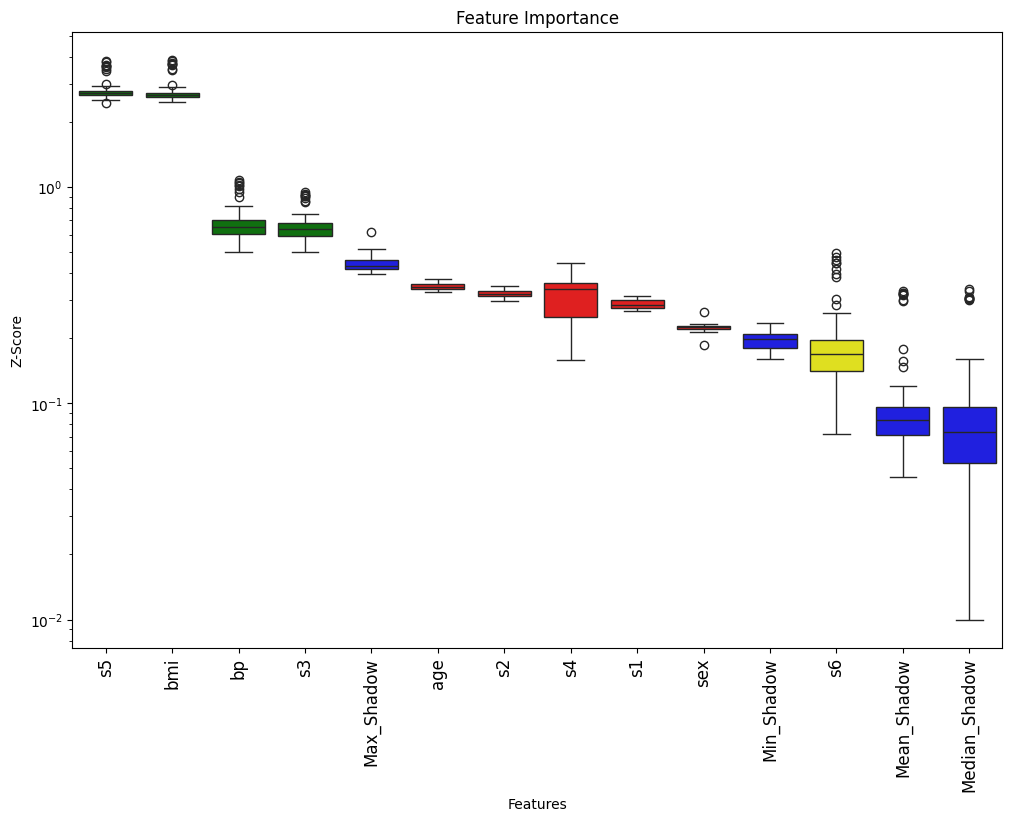

In [3]:
# Returns Boxplot of features
# I would recommend plotting Y axis on the Log Scale
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [4]:
subset = Feature_Selector.Subset()
subset.head()

,s5,bmi,bp,s3
0,0.019907,0.061696,0.021872,-0.043401
1,-0.068332,-0.051474,-0.026328,0.074412
2,0.002861,0.044451,-0.005670,-0.032356
3,0.022688,-0.011595,-0.036656,-0.036038
4,-0.031988,-0.036385,0.021872,0.008142


# Gini Regression

In [5]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='gini',
                              classification=False)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.27it/s]

4 attributes confirmed important: ['s5', 'bmi', 'bp', 's3']
6 attributes confirmed unimportant: ['age', 's4', 's1', 's6', 's2', 'sex']
0 tentative attributes remains: []


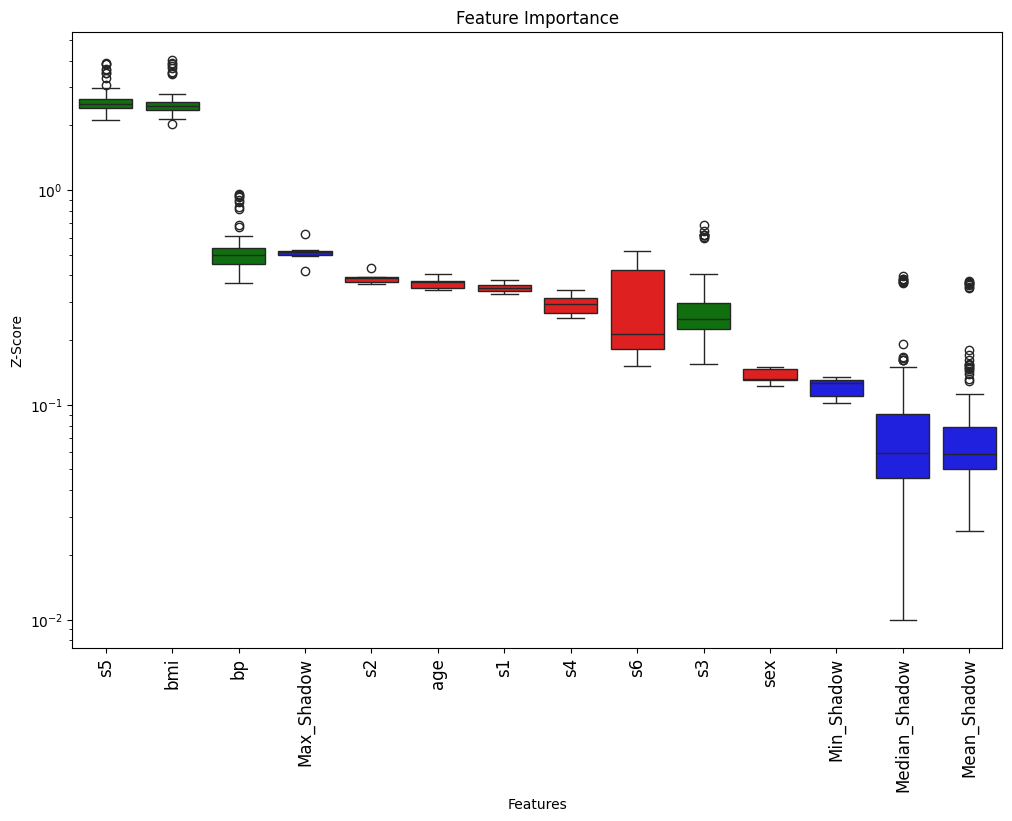

In [6]:
# Returns Boxplot of features
# I would recommend plotting Y axis on the Log Scale
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

# Shap Regression Sampling

In [7]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0, sample=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:29<00:00,  1.12it/s]

4 attributes confirmed important: ['s5', 'bmi', 'bp', 's3']
5 attributes confirmed unimportant: ['age', 's4', 's1', 's2', 'sex']
1 tentative attributes remains: ['s6']


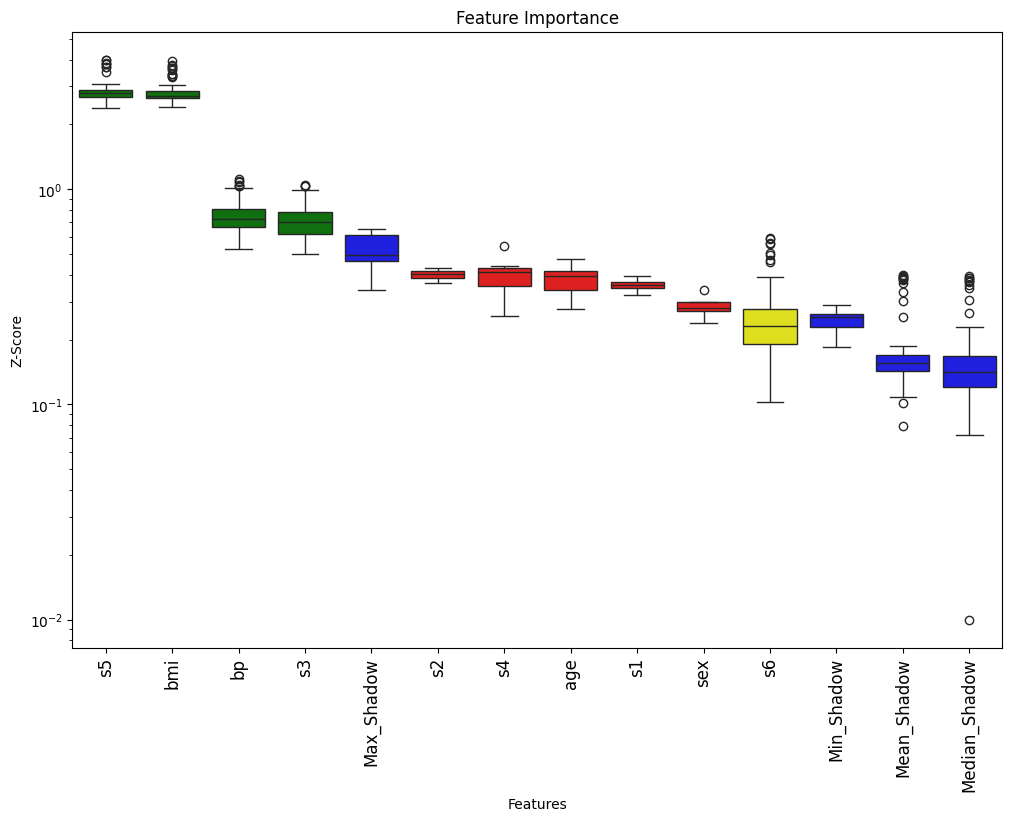

In [8]:
# Returns Boxplot of features
# I would recommend plotting Y axis on the Log Scale
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [9]:
y_np = np.array(y)
y_np

NameError: name 'np' is not defined

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np


tscv = TimeSeriesSplit(n_splits=2, test_size = int(np.floor(X.shape[0]*0.1)))
train_index, test_index = list(tscv.split(X))[1]
X.iloc[train_index], X.iloc[test_index], y[train_index], y[test_index], y_np[train_index]